<a href="https://colab.research.google.com/github/daniel-usp/MachineLearning/blob/main/04%20-%20DecisionTrees/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

#Banco de Dados Geral
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')
dados

#Definir X e y
y = dados['cancel']
X = dados.drop('cancel', axis =1)


# Calcular as Features Importance dos atributos X

from sklearn.ensemble import RandomForestClassifier

# Criação do modelo RandomForest
modelo = RandomForestClassifier()

# Treinamento do modelo
modelo.fit(X, y)

# Obter a importância das características
importancias = modelo.feature_importances_

# Converter as importâncias em um DataFrame para facilitar a visualização
importancias_df = pd.DataFrame({'feature': X.columns, 'importance': importancias})

# Exibir as importâncias em ordem decrescente
importancias_df.sort_values(by='importance', ascending=False)



,feature,importance
1,fatura,0.274290
4,renda,0.178129
2,temp_cli,0.166515
5,temp_rsd,0.144416
0,idade,0.136597
3,linhas,0.050595
7,premiere,0.026604
6,internet,0.022854


In [5]:
#Declarar X e Y
y = dados['cancel']
X = dados.drop('cancel', axis =1)
features = X.columns
features

Index(['idade', 'fatura', 'temp_cli', 'linhas', 'renda', 'temp_rsd',
       'internet', 'premiere'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

# Separando em variáveis dependentes e independentes
y = dados['cancel']
X = dados.drop('cancel', axis=1)

# Dividindo os dados em conjuntos de treinamento e teste


# Criando e treinando o modelo DecisionTreeClassifier (split = 2, máxima profundidade = 4). São Hiperparâmetros


# Avaliando o modelo com cross-validation


# Plotando a árvore de decisão


Cross-Validation Scores: [0.7875     0.765      0.7825     0.795      0.78446115]
Média dos Cross-Validation Scores: 0.7828922305764411


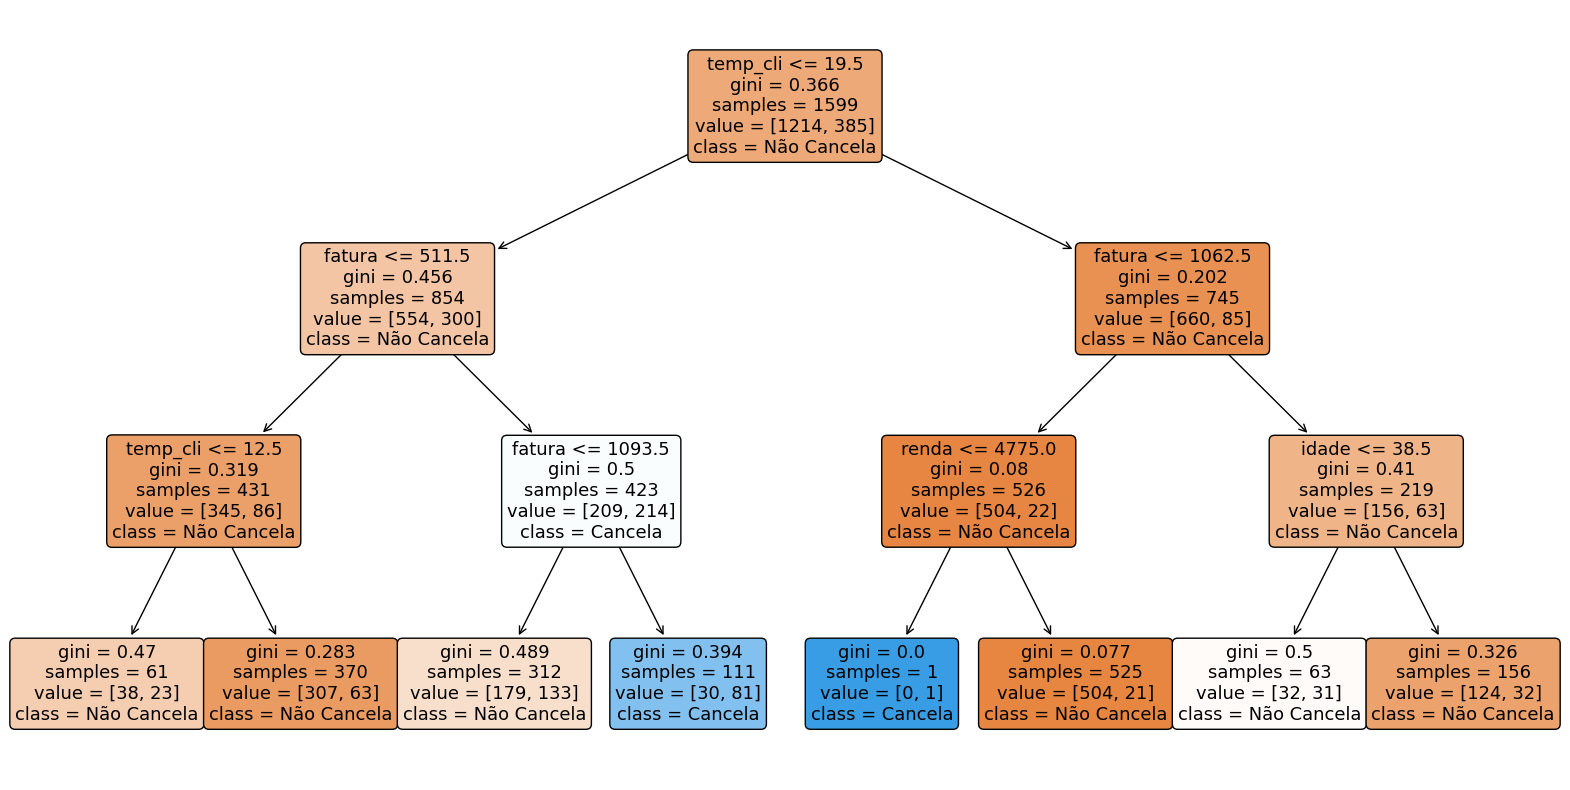

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

# Separando em variáveis dependentes e independentes
y = dados['cancel']
X = dados.drop('cancel', axis=1)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo DecisionTreeClassifier (split = 2, máxima profundidade = 4)
modelo = DecisionTreeClassifier(min_samples_split=2, max_depth=3)
modelo.fit(X_train, y_train)

# Avaliando o modelo com cross-validation
scores = cross_val_score(modelo, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
# Calculando a média dos escores do cross-validation
media_scores = scores.mean()
print(f"Média dos Cross-Validation Scores: {media_scores}")

# Plotando a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(modelo, filled=True, feature_names=X.columns, class_names=['Não Cancela', 'Cancela'], rounded=True)
plt.show()


Cross-validation scores:  [0.7        0.745      0.68       0.725      0.69674185]
Average cross-validation score:  0.7093483709273183


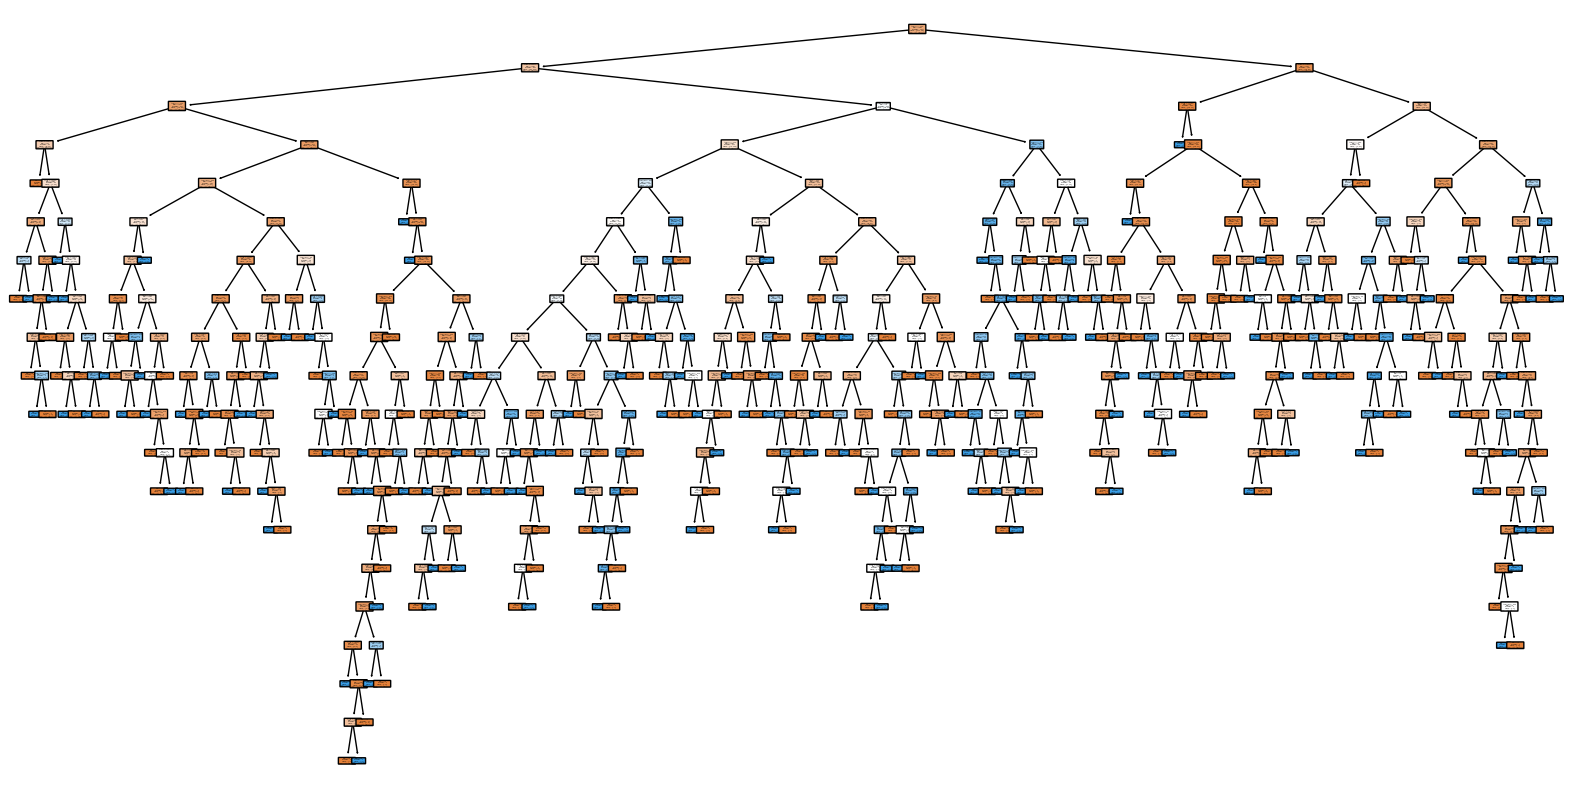

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

# Separando em variáveis dependentes e independentes
y = dados['cancel']
x = dados.drop('cancel', axis=1)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Avaliando o modelo com cross-validation
scores = cross_val_score(model, x, y, cv=5)
print('Cross-validation scores: ', scores)
print('Average cross-validation score: ', scores.mean())

# Plotando a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['Não Cancelado', 'Cancelado'], rounded=True)
plt.show()




##Otimizando Hiperparâmetros da Árvore de Decisão

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

# Separando em variáveis dependentes e independentes
y = dados['cancel']
X = dados.drop('cancel', axis=1)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo do DecisionTreeClassifier

# Definindo a grade de parâmetros para o GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,4,5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando e treinando o GridSearchCV

# Melhores parâmetros e melhor score


# Avaliando o modelo no conjunto de teste


# Plotando a árvore de decisão do melhor modelo


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Carregando os dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

# Separando em variáveis dependentes e independentes
y = dados['cancel']
X = dados.drop('cancel', axis=1)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo do DecisionTreeClassifier
modelo = DecisionTreeClassifier()

# Definindo a grade de parâmetros para o GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 4, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando e treinando o GridSearchCV
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Melhores parâmetros e melhor score
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Score:", grid_search.best_score_)

# Avaliando o modelo no conjunto de teste
melhor_modelo = grid_search.best_estimator_
predicoes = melhor_modelo.predict(X_test)
print("Acurácia no Conjunto de Teste:", accuracy_score(y_test, predicoes))

# Plotando a árvore de decisão do melhor modelo
plt.figure(figsize=(20,10))
plot_tree(melhor_modelo, filled=True, feature_names=X.columns, class_names=['Não Cancela', 'Cancela'], rounded=True)
plt.show()


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Melhores Parâmetros:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Melhor score de cross-validation: 0.79
Score no conjunto de teste: 0.78


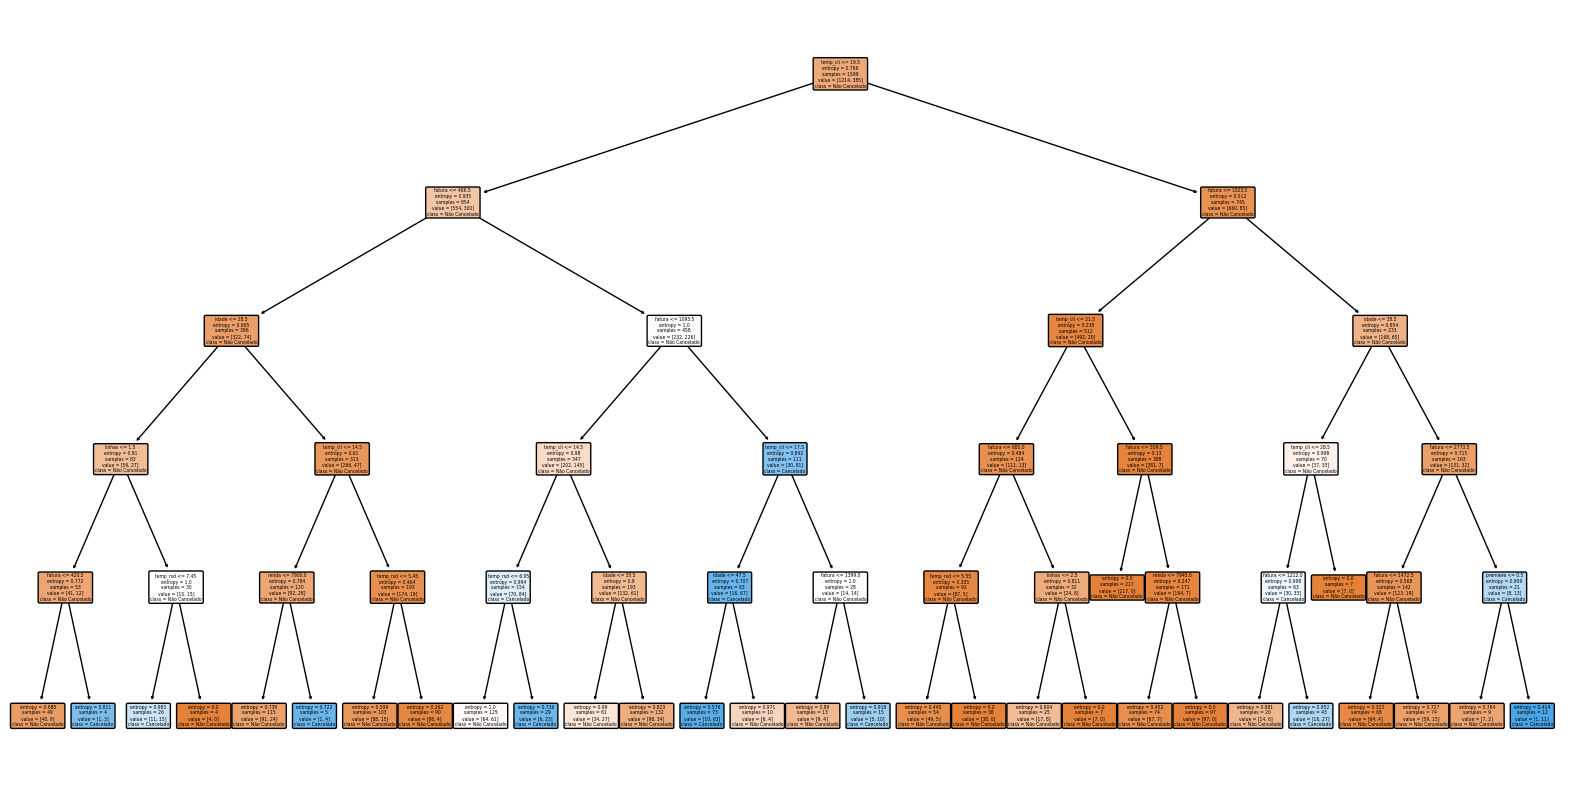

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

# Separando em variáveis dependentes e independentes
y = dados['cancel']
x = dados.drop('cancel', axis=1)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criando o modelo
model = DecisionTreeClassifier(random_state=42)

# Definindo a grade de parâmetros para o GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,4,5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando e treinando o GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Melhores parâmetros e melhor score
print("Melhores Parâmetros: ", grid_search.best_params_)
print("Melhor score de cross-validation: {:.2f}".format(grid_search.best_score_))

# Avaliando o modelo no conjunto de teste
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Score no conjunto de teste: {:.2f}".format(test_score))

# Plotando a árvore de decisão do melhor modelo
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=x.columns, class_names=['Não Cancelado', 'Cancelado'], rounded=True)
plt.show()


## Exemplo - Gestão de Cobrança do Varejo

In [ ]:
import pandas as pd

url = 'https://github.com/daniel-usp/MachineLearning/raw/main/05%20-%20KNN/varejo1.xlsx'  L

dados = pd.read_excel(url)

dados.head()

,pagamento,solteiro,idade,mulher
0,1,0,20,0
1,1,0,34,1
2,1,0,21,1
3,1,0,22,1
4,1,0,22,1


In [ ]:
import pandas as pd

url = 'https://github.com/daniel-usp/MachineLearning/raw/main/05%20-%20KNN/varejo1.xlsx'

dados = pd.read_excel(url)

# Separando em variáveis dependentes e independentes
y = dados['pagamento']
x = dados.drop('pagamento', axis=1)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criando o modelo

# Definindo a grade de parâmetros para o GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,4,5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando e treinando o GridSearchCV

# Melhores parâmetros e melhor score


# Avaliando o modelo no conjunto de teste


# Plotando a árvore de decisão do melhor modelo